# Virtual Source Validity

This tutorial implements the example provided in <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1), where a third-order-reflection virtual source is shown to be invalid. The original sketch of the example is given below:

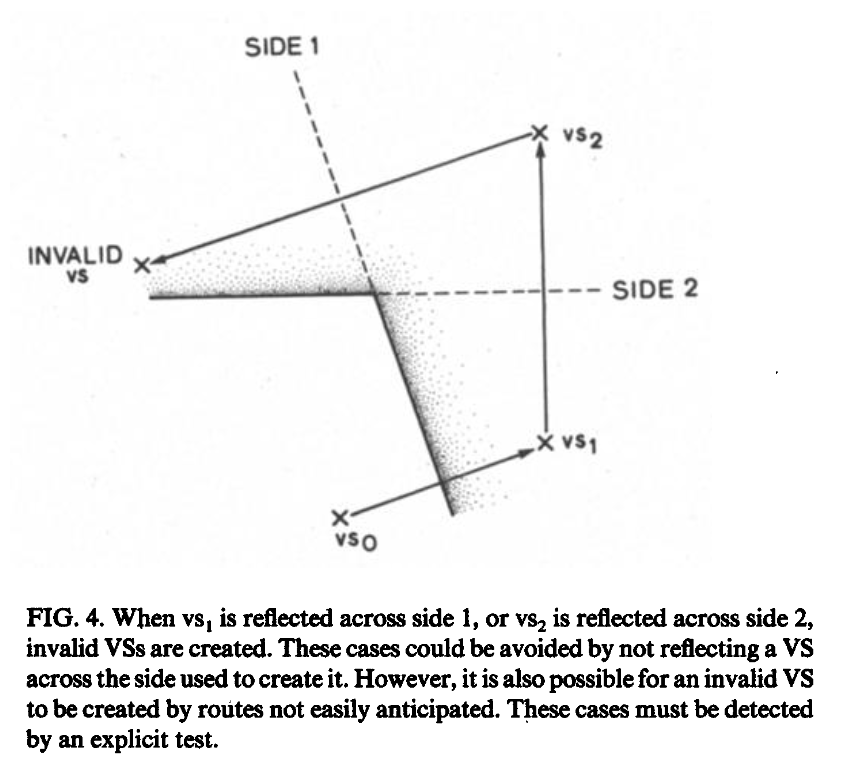

## Defining the walls

First we define the walls as [`Patch`](torchrir.geometry)s by their vertices. We assume the image above defines a top-view of the situation and a 3D coordinate system centered at the bottom of the edge between the two walls: $x$ axis is positive to the right; $y$ axis is positive to the top.


In [1]:
from torchrir.geometry import Patch
import torch

side_1 = Patch(
    torch.tensor(
        [
            [0.0, 0.0, 0.0],
            [0.5, -2.0, 0.0],
            [0.5, -2.0, 2.0],
            [0.0, 0.0, 2.0],
        ]
    ).T,
    0.7,
)
side_2 = Patch(
    torch.tensor(
        [
            [-2.0, 0.0, 0.0],
            [0.0, 0.0, 0.0],
            [0.0, 0.0, 2.0],
            [-2.0, 0.0, 2.0],
        ]
    ).T,
    0.9,
)

The order of the vertices above is important: [right-hand rule defines the direction of the normal vector](https://en.wikipedia.org/wiki/Right-hand_rule#Curve_orientation_and_normal_vectors), which should point inwards.

Now let's add the real source $vs_O$.

In [ ]:
from torchrir.source import Source


vs_o = Source(torch.tensor([-0.3, -1.0, 1.0]), intensity=3.0)


And calculate the other three using the `.mirror` method (notice that `next` is needed as `.mirror` is a generator for efficiency reasons)

In [6]:

vs_1 = next(side_1.mirror(vs_o, if_valid=True))
vs_2 = next(side_2.mirror(vs_1, if_valid=True))
vs_i = next(side_1.mirror(vs_2, if_valid=True))  # vs_i is VS invalid

print('valid sources: ', len(vs_i.p))  # No valid sources

# Now we try to mirror vs_2 without checking validity to see all sources of the example

vs_i = next(side_1.mirror(vs_2, if_valid=False))
print('all sources  : ', len(vs_i.p))

valid sources:  0
all sources  :  1


As discussed in the paper, $vs_i$ is invalid. This is detected by the validity check proposed in the section I.B<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1): The signed distance from the source to the reflecting patch is computed and, if negative, we are reflecting a source with respect to the "exterior" side of the patch. Therefore, it should be discarded.


Let's now use the ploting functions to visualize the scene.

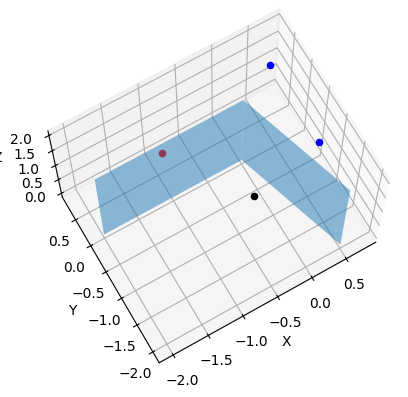

In [13]:
import matplotlib.pyplot as plt
# adjust camera of 3d axis to have a top view
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=70, azim=-120)
ax.set_box_aspect([1, 1, 1])  # aspect ratio is 1:1:1

side_1.plot(fig=fig, ax=ax, alpha=0.5)
side_2.plot(fig=fig, ax=ax, alpha=0.5)
plt.gca().set_aspect("equal", adjustable="box")
ax.scatter(vs_o.p[0], vs_o.p[1], vs_o.p[2], c='k', marker='o')

#scatter3d plot of vsi.p
for v in [vs_1, vs_2]:
    p = v.p.squeeze()
    ax.scatter(p[0], p[1], p[2], c='b', marker='o')

p = vs_i.p.squeeze()
ax.scatter(p[0], p[1], p[2], c='r', marker='o')


## References
<a name="cite_note-1">[1]</a> Jeffrey Borish, **Extension of the image model to arbitrary polyhedra**. J. Acoust. Soc. Am. 1 June 1984; 75 (6): 1827–1836. https://doi.org/10.1121/1.390983